# Generalized Metcalfe's Law for BTC Data Analytics Modeling Price Modeling based

In 1980, Xerox Palo Alto Research Center (PARC) employee Robert "Bob" Metcalfe stated that network are subjects to economical effects. Indeed, the number of connected users to a network affects the value of the network in a quadratic propotion relative to the number of nodes. George Gilder (1993) put this thought in perspective ![images/networkvalue.png](images/networkvalue.png) and named the law in honor to Metcalfe. 

![images/Metcalfes-Law-1993-The-Network-Value-accunting-for-the-Compatibly-Communicating-Components.png](images/Metcalfes-Law-1993-The-Network-Value-accunting-for-the-Compatibly-Communicating-Components.png)

The original version of Metcalfe’s law was connected to the Ethernet cards and the customers that needed to overcome a critical mass in order to benefit from their network. Since a study by Alabi (2017) underlines Metcalfe’s law adequation with Bitcoin. 

![images/Metcalfe_law.jpg](images/Metcalfe_law.jpg)

For small networks the value is in N x (N - 1) / 2, asymptotically assimilable to a N<sup>2</sup> growth rate. 


![images/Metcalfe_law1.jpg](images/Metcalfe_law1.jpg)

For mature network Metcalfe’s law is better expressed in the terms N x Log (N), known as Odlyzko Law or also called Zipf’s Law. This modificstion accounts for the "marginal effect", the fact that the bigger a network becomes the least the synergy effect can express itself.


The number or unique addresses is correlated to the growth of the value of the network. Furthermore, Metcalfe’s law operates well with the networks of those cryptocurrencies. 

It might makes easier to effectively identify possible bubbles... but let's see.

In [1]:
# %pip install pytrends    # Optional
# conda install tensorflow # Optional

## Data modeling
We use the concept from ["Combining a Generalized Metcalfe\'s Law and the LPPLS Model"](https://royalsocietypublishing.org/doi/10.1098/rsos.180538)
by Prof. [Didier Sornette](https://en.wikipedia.org/wiki/Didier_Sornette) 


In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import datetime
import json
import math
date_start = '2017-01-01'
date_end = '2021-06-23'

#################################### ETL ####################################
aa_url = 'https://api.glassnode.com/v1/metrics/addresses/active_count'
mc_url = 'https://api.glassnode.com/v1/metrics/market/marketcap_usd'
cs_url = 'https://api.glassnode.com/v1/metrics/supply/current'
pc_url = 'https://api.glassnode.com/v1/metrics/market/price_usd_close'

parameters = {
    'api_key' : '1uQyF752R9hmOJ54OpMD64NF5p9',
    #your API key#', ### API Key required here, you may need to apply to Glassnode.com.
    'a' : 'BTC',
    'i' : '24h',
    'c' : 'native',
}

def get_purifed_data(api_url, api_parameters):
    session = Session()
    try:
        response = session.get(api_url, params=api_parameters)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    df = pd.DataFrame(json.loads(response.text))
    df = df.set_index('t')
    df.index = pd.to_datetime(df.index, unit='s')
    df = df.loc[df.index > date_start] # Day 1 of BTC API Data: 2010-7-17
    df = df.loc[df.index < date_end]
    df.reset_index(inplace=True)
    return df

aa_data = get_purifed_data(aa_url, parameters)
mc_data = get_purifed_data(mc_url, parameters)
cs_data = get_purifed_data(cs_url, parameters)
pc_data = get_purifed_data(pc_url, parameters)

In [12]:
aa_data
aa_data.index

def aa_growth_modeling_4prams(x, a, b, c, d):
# Function for Active Address Estimation Curve Fitting
    return (np.e**(a) * np.e**(-b * np.e**(-c * x**d)))

RangeIndex(start=0, stop=1633, step=1)

In [14]:
# Function for Active Address Estimation Curve Fitting
def aa_growth_modeling_4prams(x, a, b, c, d):
    return (np.e**(a) * np.e**(-b * np.e**(-c * x**d)))

def fit_aa_curve_coe_4prams():
# Active Address Estimation Curve Fitting and Coefficient Calculation)
    aa_real_nums = np.array(aa_data['v'])
    aa_date_array = aa_data.index
    coe_guess = [1.72, 1.76, 0.79, 0.70]
    est_coe, est_cov = curve_fit(aa_growth_modeling_4prams, 
                                 aa_date_array, 
                                 aa_real_nums, 
                                 coe_guess, 
                                 maxfev = 1000000)
    return est_coe

def aa_growth_distns_4prams(x):
# Active Addresses Growth Curve / Equation
    a, b, c, d = fit_aa_curve_coe_4prams()
    return (np.exp(a) * np.exp(-b * np.exp(-c * x**d)))

x1 = aa_data.index
y1 = aa_growth_distns_4prams(x1)
y1

Float64Index([ 713773.5171221917,  713773.5171221917,  713773.5171221917,
               713773.5171221917,  713773.5171221917,  713773.5171221917,
               713773.5171221917,  713773.5171221917,  713773.5171221917,
               713773.5171221917,
              ...
              1079987.1631050555, 1080039.7169676137, 1080091.7594558606,
              1080143.2957770762, 1080194.3310838544, 1080244.8704746827,
               1080294.918994513, 1080344.4816353288,  1080393.563336705,
              1080442.1689863633],
             dtype='float64', length=1633)


#### Active Addresses
do the active address curve fitting

#### Market Cap
Active Address Estimation Curve Fitting and Coefficient Calculation)

# Data Visualization

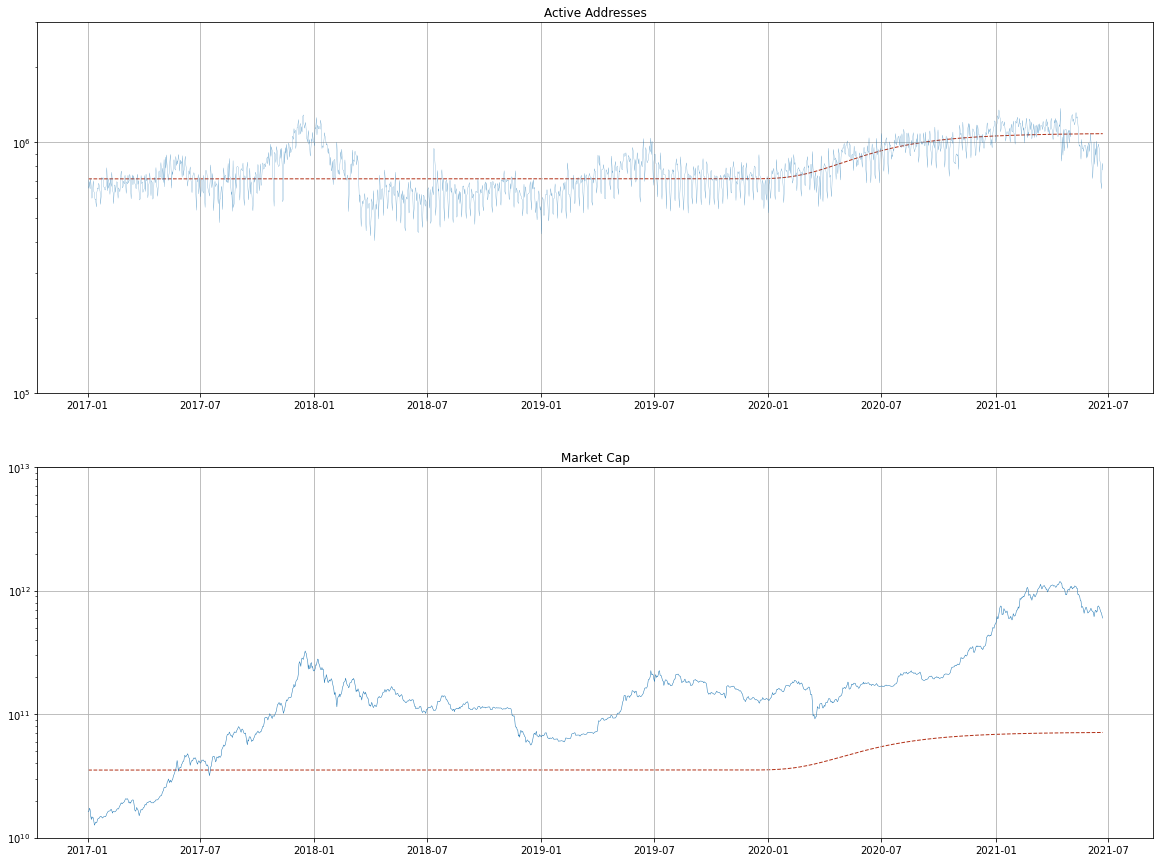

In [40]:
############################ Data Visualization ###########################
fig, main_ax = plt.subplots(2,1, figsize=(20, 15))
# Show the active address curve fitting
main_ax[0].title.set_text('Active Addresses')
main_ax[ 0].plot(aa_data['t'], aa_data['v'], linewidth=0.2)

main_ax[ 0].plot(aa_data['t'], y1, 
                       color=(0.7, 0.2, 0.1), 
                       linewidth=1, 
                       linestyle='--', 
                       zorder=1)
main_ax[0].set_yscale('log')
main_ax[0].set_ylim(pow(10, 5), 3*pow(10, 6)) # Set the Y axis
main_ax[0].grid(True)

# down  plot:
main_ax[1].title.set_text('Market Cap')
main_ax[1].plot(mc_data['t'], mc_data['v'], 
                       linewidth=0.5)
#y2 = marketcap_to_activeaddress_log_linear(y1)
main_ax[1].plot(mc_data['t'], y2, 
                       color=(0.7, 0.2, 0.1), 
                       linewidth=1, 
                       linestyle='--', 
                       zorder=1)
main_ax[1].set_yscale('log') #basey = np.e
main_ax[1].set_ylim(pow(10, 10), pow(10, 13))  # Set the Y axis
main_ax[1].grid(True)
plt.show()

## Generalized Metcalfe Regression / Generalized Metcalfe's Law
formula: 4.53 * X<sup>1.69</sup>

In [42]:
def linear_fit_marketcap_to_activeaddress_coe():
# Market Cap to Active Address Line Fitting (log linear)
    aa_log = np.log(np.array(aa_data['v']))
    mc_log = np.log(np.array(mc_data['v']))
    return np.polyfit(aa_log, mc_log, 1)

def marketcap_to_activeaddress_log_linear(x):
# Generalized Metcalfe Regression / Generalized Metcalfe's Law
    a, b = linear_fit_marketcap_to_activeaddress_coe()
    return (np.exp(1.51) * pow(x, 1.69))   # 4.526730794314252 x X^1.69

y2 = marketcap_to_activeaddress_log_linear(y1)
y2

Float64Index([35342868524.18613, 35342868524.18613, 35342868524.18613,
              35342868524.18613, 35342868524.18613, 35342868524.18613,
              35342868524.18613, 35342868524.18613, 35342868524.18613,
              35342868524.18613,
              ...
              71164285046.40538, 71170137555.99025,   71175933311.489,
              71181672887.16032, 71187356851.30385, 71192985766.32185,
              71198560188.78008, 71204080669.46805,  71209547753.4589,
              71214961980.16847],
             dtype='float64', length=1633)

In [56]:
# Function for Coin in Circulation Estimation Curve Fitting
def coins_in_circulation_modeling(x, a, b, c, d):
    return (a + b * x + c * x**2 + d * x**3)

# Coin in Circulation Estimation Curve Fitting and Coefficient Calculation
def fit_coins_in_circulation_coe():
    cs_data = get_purifed_data(cs_url, parameters)
    cs_real_nums = np.array(cs_data['v'])
    cs_date_array = cs_data.index
    coe_guess = [3000000, 300000, 100000, 100000]
    est_coe, est_cov = curve_fit(coins_in_circulation_modeling, 
                                 cs_date_array, 
                                 cs_real_nums, 
                                 coe_guess, 
                                 maxfev = 1000000)
    return est_coe

def coins_in_circulation_distns(x):
# Coins in Circulation curve / Equation
    a, b, c, d = fit_coins_in_circulation_coe()
    return (a + b * x + c * x**2 + d * x**3)

y4 = y2/coins_in_circulation_distns(cs_data.index)
y4

Float64Index([ 2194.427011634765, 2194.2045736615887,  2193.982009543938,
               2193.759319694457, 2193.5365045255485,  2193.313564449376,
              2193.0904998778615,  2192.867311222689,    2192.6439988953,
              2192.4205633068937,
              ...
              3799.9080902699584,  3800.107123905553,  3800.303639398173,
              3800.4976681942258,  3800.689241416274, 3800.8783898664224,
              3801.0651440296433, 3801.2495340770897,   3801.43158986937,
              3801.6113409597865],
             dtype='float64', length=1633)

## Market Cap to Active Addresses

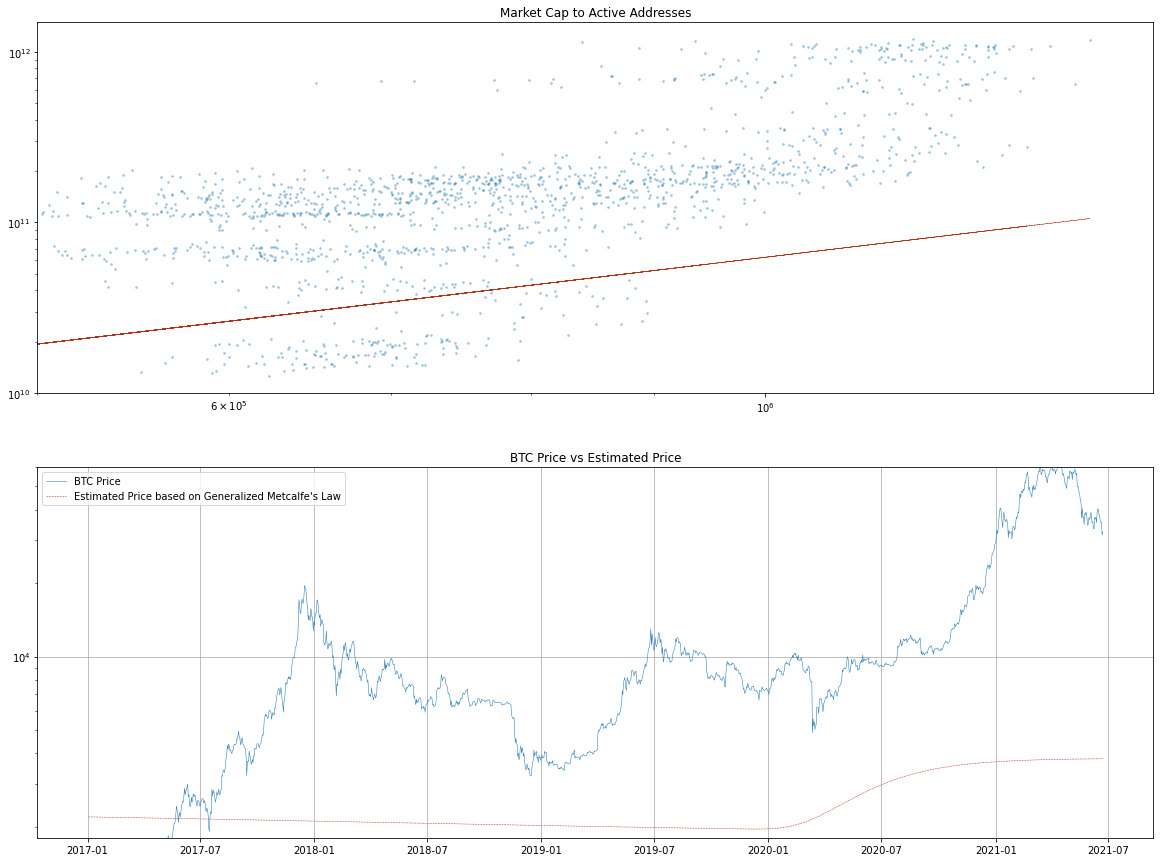

In [64]:
fig, main_ax = plt.subplots(2,1, figsize=(20, 15)) #Market Cap to Active Addresses
main_ax[0].title.set_text('Market Cap to Active Addresses')
main_ax[0].scatter(aa_data['v'], mc_data['v'], 
                          s=3, 
                          alpha=0.3)
x3 = aa_data['v']
y3 = marketcap_to_activeaddress_log_linear(x3)
main_ax[0].plot(x3, y3, 
                       color=(0.7, 0.2, 0.1), 
                       linewidth=0.5, 
                       linestyle='--', 
                       zorder=1)
main_ax[0].set_xscale('log')
main_ax[0].set_yscale('log')
main_ax[0].set_xlim(500000, )
main_ax[0].set_ylim(pow(10, 10), )

# BTC Price vs Estimated Price
main_ax[1].title.set_text('BTC Price vs Estimated Price')
main_ax[1].plot(pc_data['t'], pc_data['v'], 
                       linewidth=0.5, 
                       label='BTC Price')
main_ax[1].plot(pc_data['t'], y4, 
                       color=(0.7, 0.2, 0.1), 
                       linewidth=0.5, 
                       linestyle='--', 
                       zorder=1, 
                       label="Estimated Price based on Generalized Metcalfe's Law")
main_ax[1].legend()
main_ax[1].set_yscale('log')
main_ax[1].set_ylim(1800, 60000)
main_ax[1].grid(True)

We are not there yet